<a href="https://www.kaggle.com/code/hikageshinomori/notebooka59b5047f9?scriptVersionId=179117440" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [ ]:
import pandas as pd

In [ ]:
train_data = pd.read_csv('/kaggle/input/playground-series-s4e5/train.csv')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

In [ ]:
test_data = pd.read_csv("/kaggle/input/playground-series-s4e5/test.csv")

In [ ]:
X = train_data.drop(columns=['FloodProbability'])
y = train_data['FloodProbability']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
test_data_scaled = scaler.transform(test_data)

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Machine": SVR(),
    "XGBoost": XGBRegressor(),
    "LightGBM": LGBMRegressor(),
    "CatBoost": CatBoostRegressor()
}

best_model = None
best_rmse = float('inf')

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_scaled, y_train)
    y_pred_train = model.predict(X_train_scaled)
    y_pred_val = model.predict(X_val_scaled)
    
    val_rmse = mean_squared_error(y_val, y_pred_val, squared=False)
    
    print(f"Validation RMSE: {val_rmse:.2f}")
    print()
    
    if val_rmse < best_rmse:
        best_rmse = val_rmse
        best_model = model

print(f"Making predictions using the best model...")
predictions = best_model.predict(test_data_scaled)
submission = pd.DataFrame({'id': test_data['id'], 'FloodProbability': predictions})
submission.to_csv("best_model_submission.csv", index=False)
print(f"Predictions saved for the best model")

In [ ]:
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer=Adam(), loss='mean_squared_error')

history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_val_scaled, y_val), verbose=1)



In [ ]:

predictions = model.predict(test_data_scaled)

submission = pd.DataFrame({'id': test_data['id'], 'FloodProbability': predictions.flatten()})
submission.to_csv("deep_learning_submission.csv", index=False)
print("Predictions saved for the deep learning model")

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
param_grid = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [6, 8, 10],
    'l2_leaf_reg': [1, 3, 5]
}

# Initialize CatBoostRegressor
catboost = CatBoostRegressor(verbose=0)

# Perform GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=catboost, param_grid=param_grid, cv=3, scoring='neg_root_mean_squared_error', verbose=2)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters:", best_params)

# Initialize CatBoost with the best parameters
best_catboost = CatBoostRegressor(**best_params, verbose=0)

# Train the model
best_catboost.fit(X_train, y_train)

# Evaluate the model
train_rmse = mean_squared_error(y_train, best_catboost.predict(X_train), squared=False)
val_rmse = mean_squared_error(y_val, best_catboost.predict(X_val), squared=False)
print(f"Train RMSE: {train_rmse:.2f}")
print(f"Validation RMSE: {val_rmse:.2f}")

# Make predictions on test data
predictions = best_catboost.predict(test_data)

# Save predictions to CSV
submission = pd.DataFrame({'id': test_data['id'], 'FloodProbability': predictions})
submission.to_csv("best_catboost_submission.csv", index=False)
print("Predictions saved for the best CatBoost model")

In [48]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [49]:
df = pd.read_csv('/kaggle/input/playground-series-s4e5/train.csv')
df.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


In [50]:
df.isna().sum()

id                                 0
MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
dtype: int64

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1117957 non-null  int64  
 1   MonsoonIntensity                 1117957 non-null  int64  
 2   TopographyDrainage               1117957 non-null  int64  
 3   RiverManagement                  1117957 non-null  int64  
 4   Deforestation                    1117957 non-null  int64  
 5   Urbanization                     1117957 non-null  int64  
 6   ClimateChange                    1117957 non-null  int64  
 7   DamsQuality                      1117957 non-null  int64  
 8   Siltation                        1117957 non-null  int64  
 9   AgriculturalPractices            1117957 non-null  int64  
 10  Encroachments                    1117957 non-null  int64  
 11  IneffectiveDisasterPreparedness  1117957 non-null 

In [52]:
for column in df.columns : 
    print(column)
    print(df[column].unique())
    print("---------------------------------------------------------------")

id
[      0       1       2 ... 1117954 1117955 1117956]
---------------------------------------------------------------
MonsoonIntensity
[ 5  6  3  8  4  7  9  2 10  1  0 11 12 13 15 14 16]
---------------------------------------------------------------
TopographyDrainage
[ 8  7  5  4  3  6  2  1  9 10 12  0 11 14 13 16 15 17 18]
---------------------------------------------------------------
RiverManagement
[ 5  4  6  2  1  8  3  0  9  7 10 11 12 15 13 14 16]
---------------------------------------------------------------
Deforestation
[ 8  4  7  5  6  2  3  9  0 10  1 13 11 12 14 15 16 17]
---------------------------------------------------------------
Urbanization
[ 6  8  3  4  2  5 10  7  9 11  1  0 12 13 16 14 15 17]
---------------------------------------------------------------
ClimateChange
[ 4  8  7  5  6  3  2  1  0 10  9 12 11 13 14 15 16 17]
---------------------------------------------------------------
DamsQuality
[ 4  3  1  6  2  5  8  7  9 12 11 10  0 14 13 15 16]
----

In [53]:
test_df = pd.read_csv('/kaggle/input/playground-series-s4e5/test.csv')
test_df.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,1117957,4,6,3,5,6,7,8,7,8,...,8,5,7,5,6,3,6,4,4,5
1,1117958,4,4,2,9,5,5,4,7,5,...,2,4,7,4,5,1,7,4,4,3
2,1117959,1,3,6,5,7,2,4,6,4,...,7,9,2,5,5,2,3,6,8,3
3,1117960,2,4,4,6,4,5,4,3,4,...,7,8,4,6,7,6,4,2,4,4
4,1117961,6,3,2,4,6,4,5,5,3,...,4,3,2,6,4,6,8,4,5,5


In [54]:

for column in df.columns : 
    if column !='FloodProbability':
        df[column] = (df[column]-df[column].min())/(df[column].max()-df[column].min())

In [55]:
df.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0.000000e+00,0.3125,0.444444,0.3125,0.470588,0.352941,0.235294,0.2500,0.1875,0.1875,...,0.294118,0.176471,0.1875,0.3125,0.235294,0.388889,0.263158,0.4375,0.1875,0.445
1,8.944896e-07,0.3750,0.388889,0.2500,0.235294,0.470588,0.470588,0.1875,0.3125,0.2500,...,0.411765,0.117647,0.0000,0.1875,0.294118,0.166667,0.157895,0.2500,0.1875,0.450
2,1.788979e-06,0.3750,0.277778,0.3750,0.411765,0.176471,0.411765,0.0625,0.3125,0.2500,...,0.411765,0.176471,0.4375,0.3125,0.352941,0.444444,0.105263,0.1875,0.1875,0.530
3,2.683469e-06,0.1875,0.222222,0.3750,0.294118,0.235294,0.470588,0.2500,0.4375,0.3750,...,0.117647,0.235294,0.4375,0.2500,0.235294,0.333333,0.263158,0.4375,0.3125,0.535
4,3.577958e-06,0.3125,0.166667,0.1250,0.352941,0.235294,0.235294,0.1875,0.1875,0.1875,...,0.117647,0.117647,0.3750,0.3750,0.235294,0.055556,0.105263,0.1875,0.3125,0.415


In [56]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()


In [57]:
df.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0.000000e+00,0.3125,0.444444,0.3125,0.470588,0.352941,0.235294,0.2500,0.1875,0.1875,...,0.294118,0.176471,0.1875,0.3125,0.235294,0.388889,0.263158,0.4375,0.1875,0.445
1,8.944896e-07,0.3750,0.388889,0.2500,0.235294,0.470588,0.470588,0.1875,0.3125,0.2500,...,0.411765,0.117647,0.0000,0.1875,0.294118,0.166667,0.157895,0.2500,0.1875,0.450
2,1.788979e-06,0.3750,0.277778,0.3750,0.411765,0.176471,0.411765,0.0625,0.3125,0.2500,...,0.411765,0.176471,0.4375,0.3125,0.352941,0.444444,0.105263,0.1875,0.1875,0.530
3,2.683469e-06,0.1875,0.222222,0.3750,0.294118,0.235294,0.470588,0.2500,0.4375,0.3750,...,0.117647,0.235294,0.4375,0.2500,0.235294,0.333333,0.263158,0.4375,0.3125,0.535
4,3.577958e-06,0.3125,0.166667,0.1250,0.352941,0.235294,0.235294,0.1875,0.1875,0.1875,...,0.117647,0.117647,0.3750,0.3750,0.235294,0.055556,0.105263,0.1875,0.3125,0.415


In [58]:
df.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0.000000e+00,0.3125,0.444444,0.3125,0.470588,0.352941,0.235294,0.2500,0.1875,0.1875,...,0.294118,0.176471,0.1875,0.3125,0.235294,0.388889,0.263158,0.4375,0.1875,0.445
1,8.944896e-07,0.3750,0.388889,0.2500,0.235294,0.470588,0.470588,0.1875,0.3125,0.2500,...,0.411765,0.117647,0.0000,0.1875,0.294118,0.166667,0.157895,0.2500,0.1875,0.450
2,1.788979e-06,0.3750,0.277778,0.3750,0.411765,0.176471,0.411765,0.0625,0.3125,0.2500,...,0.411765,0.176471,0.4375,0.3125,0.352941,0.444444,0.105263,0.1875,0.1875,0.530
3,2.683469e-06,0.1875,0.222222,0.3750,0.294118,0.235294,0.470588,0.2500,0.4375,0.3750,...,0.117647,0.235294,0.4375,0.2500,0.235294,0.333333,0.263158,0.4375,0.3125,0.535
4,3.577958e-06,0.3125,0.166667,0.1250,0.352941,0.235294,0.235294,0.1875,0.1875,0.1875,...,0.117647,0.117647,0.3750,0.3750,0.235294,0.055556,0.105263,0.1875,0.3125,0.415


In [59]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['FloodProbability'])
y = df['FloodProbability']

In [60]:
X.shape

(1117957, 21)

In [61]:
df.shape

(1117957, 22)

In [62]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.3)

In [63]:
dt.fit(X_train , y_train)
y_pred = dt.predict(X_test)

In [66]:
from sklearn.metrics import r2_score , mean_squared_error
print(r2_score(y_test , y_pred))

0.033002851179616766


In [67]:
print(mean_squared_error(y_test , y_pred))

0.0025138540287666833


In [68]:
test_df

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,1117957,4,6,3,5,6,7,8,7,8,...,8,5,7,5,6,3,6,4,4,5
1,1117958,4,4,2,9,5,5,4,7,5,...,2,4,7,4,5,1,7,4,4,3
2,1117959,1,3,6,5,7,2,4,6,4,...,7,9,2,5,5,2,3,6,8,3
3,1117960,2,4,4,6,4,5,4,3,4,...,7,8,4,6,7,6,4,2,4,4
4,1117961,6,3,2,4,6,4,5,5,3,...,4,3,2,6,4,6,8,4,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745300,1863257,5,4,8,3,5,4,4,5,5,...,5,6,1,3,5,6,4,4,6,6
745301,1863258,4,4,2,12,4,3,4,3,5,...,3,7,4,4,3,5,5,3,5,4
745302,1863259,5,7,9,5,5,6,7,5,5,...,6,11,3,11,4,5,9,5,5,4
745303,1863260,4,7,6,3,5,2,3,8,6,...,6,6,8,6,2,3,8,7,5,5


In [69]:
sample = pd.read_csv('/kaggle/input/playground-series-s4e5/sample_submission.csv')

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import numpy as np

# Load data
train_data = pd.read_csv('/kaggle/input/playground-series-s4e5/train.csv')
test_data = pd.read_csv('/kaggle/input/playground-series-s4e5/test.csv')

# Separate features and target
X = train_data.drop(columns=['FloodProbability'])
y = train_data['FloodProbability']

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
test_data_scaled = scaler.transform(test_data)


In [11]:
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score

# Initialize K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
lgbm_r2_scores = []

for train_index, val_index in kf.split(X_scaled):
    X_train_fold, X_val_fold = X_scaled[train_index], X_scaled[val_index]
    y_train_fold, y_val_fold = y[train_index], y[val_index]
    
    # Initialize and train LightGBM model
    lgbm = LGBMRegressor()
    lgbm.fit(X_train_fold, y_train_fold)
    
    # Predict on validation set
    lgbm_val_predictions = lgbm.predict(X_val_fold)
    lgbm_r2 = r2_score(y_val_fold, lgbm_val_predictions)
    lgbm_r2_scores.append(lgbm_r2)

print(f"LightGBM Mean Validation R²: {np.mean(lgbm_r2_scores):.2f}")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.151285 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 621
[LightGBM] [Info] Number of data points in the train set: 894365, number of used features: 21
[LightGBM] [Info] Start training from score 0.504480
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.153427 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 623
[LightGBM] [Info] Number of data points in the train set: 894365, number of used features: 21
[LightGBM] [Info] Start training from score 0.504511
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.157745 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 623
[LightGBM] [Info] Number of data points in the train set: 894366, number of used features: 21
[LightGBM] [Info] Start tra

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import r2_score

kf = KFold(n_splits=5, shuffle=True, random_state=42)
dl_r2_scores = []

for train_index, val_index in kf.split(X_scaled):
    X_train_fold, X_val_fold = X_scaled[train_index], X_scaled[val_index]
    y_train_fold, y_val_fold = y[train_index], y[val_index]
    
    # Build and compile the deep learning model
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train_fold.shape[1],)),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(1)
    ])
    model.compile(optimizer=Adam(), loss='mean_squared_error')

    # Train the model
    model.fit(X_train_fold, y_train_fold, epochs=10, batch_size=64, validation_data=(X_val_fold, y_val_fold), verbose=1)

    # Predict on validation set
    dl_val_predictions = model.predict(X_val_fold).flatten()
    dl_r2 = r2_score(y_val_fold, dl_val_predictions)
    dl_r2_scores.append(dl_r2)

print(f"Deep Learning Mean Validation R²: {np.mean(dl_r2_scores):.2f}")


In [ ]:
# Combine predictions
combined_val_predictions = (lgbm_val_predictions + dl_val_predictions) / 2
combined_rmse = mean_squared_error(y_val, combined_val_predictions, squared=False)
print(f"Combined Validation RMSE: {combined_rmse:.2f}")

# Train both models on the entire training data
lgbm.fit(X, y)
model.fit(scaler.transform(X), y, epochs=50, batch_size=32, verbose=1)

# Make predictions on test data
lgbm_test_predictions = lgbm.predict(test_data_scaled)
dl_test_predictions = model.predict(test_data_scaled).flatten()

# Combine test predictions
combined_test_predictions = (lgbm_test_predictions + dl_test_predictions) / 2

# Save predictions to CSV
submission = pd.DataFrame({'id': test_data['id'], 'FloodProbability': combined_test_predictions})
submission.to_csv("combined_model_submission.csv", index=False)
print("Predictions saved for the combined model")


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import numpy as np

# Load data
train_data = pd.read_csv('/kaggle/input/playground-series-s4e5/train.csv')
test_data = pd.read_csv('/kaggle/input/playground-series-s4e5/test.csv')

# Separate features and target
X = train_data.drop(columns=['FloodProbability'])
y = train_data['FloodProbability']

# Split into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
test_data_scaled = scaler.transform(test_data)


In [16]:
from lightgbm import LGBMRegressor

# Initialize and train LightGBM model
lgbm = LGBMRegressor()
lgbm.fit(X_train_scaled, y_train)

# Predict on validation set
lgbm_val_predictions = lgbm.predict(X_val_scaled)
lgbm_r2 = r2_score(y_val, lgbm_val_predictions)
print(f"LightGBM Validation R²: {lgbm_r2:.2f}")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.152620 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 624
[LightGBM] [Info] Number of data points in the train set: 894365, number of used features: 21
[LightGBM] [Info] Start training from score 0.504480
LightGBM Validation R²: 0.77


In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Build and compile the deep learning model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1)
])
model.compile(optimizer=Adam(), loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, y_train, epochs=10, batch_size=64, validation_data=(X_val_scaled, y_val), verbose=1)

# Predict on validation set
dl_val_predictions = model.predict(X_val_scaled).flatten()
dl_r2 = r2_score(y_val, dl_val_predictions)
print(f"Deep Learning Validation R²: {dl_r2:.2f}")


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
13975/13975 ━━━━━━━━━━━━━━━━━━━━ 31s 2ms/step - loss: 0.0098 - val_loss: 3.9320e-04
Epoch 2/10
13975/13975 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - loss: 4.4248e-04 - val_loss: 3.8776e-04
Epoch 3/10
13975/13975 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - loss: 4.2254e-04 - val_loss: 3.9074e-04
Epoch 4/10
13975/13975 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - loss: 4.2037e-04 - val_loss: 4.4119e-04
Epoch 5/10
13975/13975 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - loss: 4.1738e-04 - val_loss: 3.8642e-04
Epoch 6/10
13975/13975 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - loss: 4.1644e-04 - val_loss: 4.4174e-04
Epoch 7/10
13975/13975 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - loss: 4.1481e-04 - val_loss: 4.1463e-04
Epoch 8/10
13975/13975 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - loss: 4.1463e-04 - val_loss: 3.7821e-04
Epoch 9/10
13975/13975 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - loss: 4.1369e-04 - val_loss: 4.0020e-04
Epoch 10/10
13975/13975 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - loss: 4.1335e-04 - val_loss: 4.1790e-04
6988/6988 ━━━

In [ ]:
# Combine predictions
combined_val_predictions = (lgbm_val_predictions + dl_val_predictions) / 2
combined_r2 = r2_score(y_val, combined_val_predictions)
print(f"Combined Validation R²: {combined_r2:.2f}")

# Train both models on the entire training data
lgbm.fit(X, y)
model.fit(scaler.transform(X), y, epochs=50, batch_size=32, verbose=1)

# Make predictions on test data
lgbm_test_predictions = lgbm.predict(test_data_scaled)
dl_test_predictions = model.predict(test_data_scaled).flatten()

# Combine test predictions
combined_test_predictions = (lgbm_test_predictions + dl_test_predictions) / 2

# Save predictions to CSV
submission = pd.DataFrame({'id': test_data['id'], 'FloodProbability': combined_test_predictions})
submission.to_csv("combined_model_submission.csv", index=False)
print("Predictions saved for the combined model")


Combined Validation R²: 0.82
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.192368 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 602
[LightGBM] [Info] Number of data points in the train set: 1117957, number of used features: 21
[LightGBM] [Info] Start training from score 0.504480
Epoch 1/50
34937/34937 ━━━━━━━━━━━━━━━━━━━━ 55s 2ms/step - loss: 4.2782e-04
Epoch 2/50
 9143/34937 ━━━━━━━━━━━━━━━━━━━━ 36s 1ms/step - loss: 4.2795e-04

Train: 1117957
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1117957 non-null  int64  
 1   MonsoonIntensity                 1117957 non-null  int64  
 2   TopographyDrainage               1117957 non-null  int64  
 3   RiverManagement                  1117957 non-null  int64  
 4   Deforestation                    1117957 non-null  int64  
 5   Urbanization                     1117957 non-null  int64  
 6   ClimateChange                    1117957 non-null  int64  
 7   DamsQuality                      1117957 non-null  int64  
 8   Siltation                        1117957 non-null  int64  
 9   AgriculturalPractices            1117957 non-null  int64  
 10  Encroachments                    1117957 non-null  int64  
 11  IneffectiveDisasterPreparedness  11

<Figure size 2500x1200 with 0 Axes>

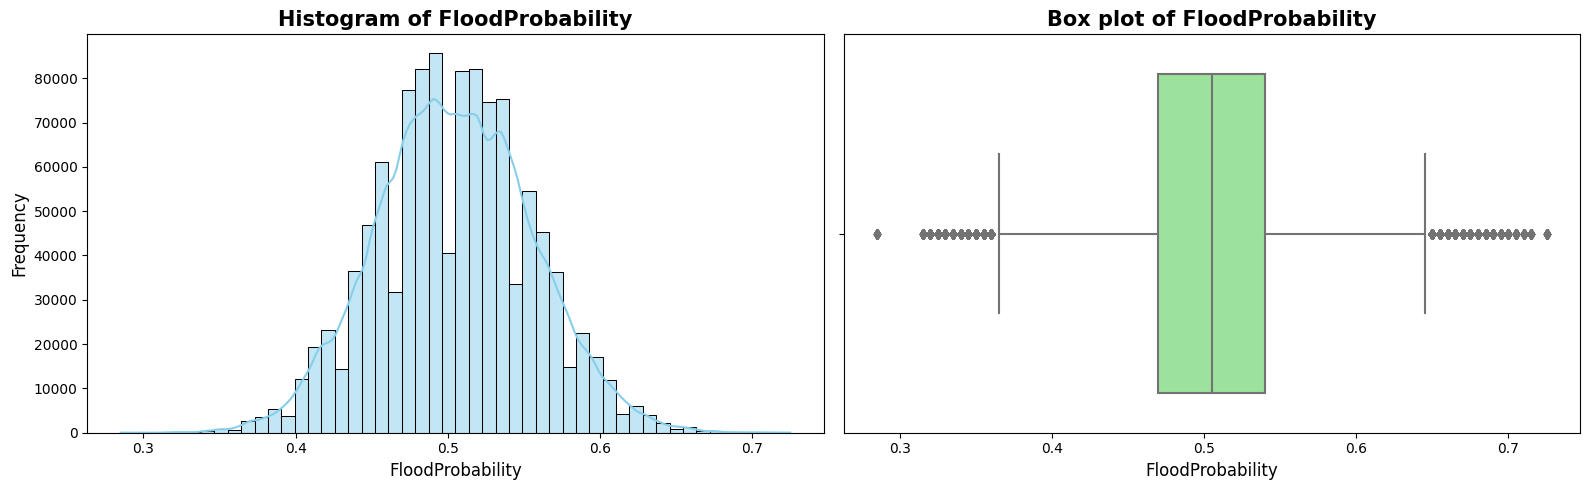

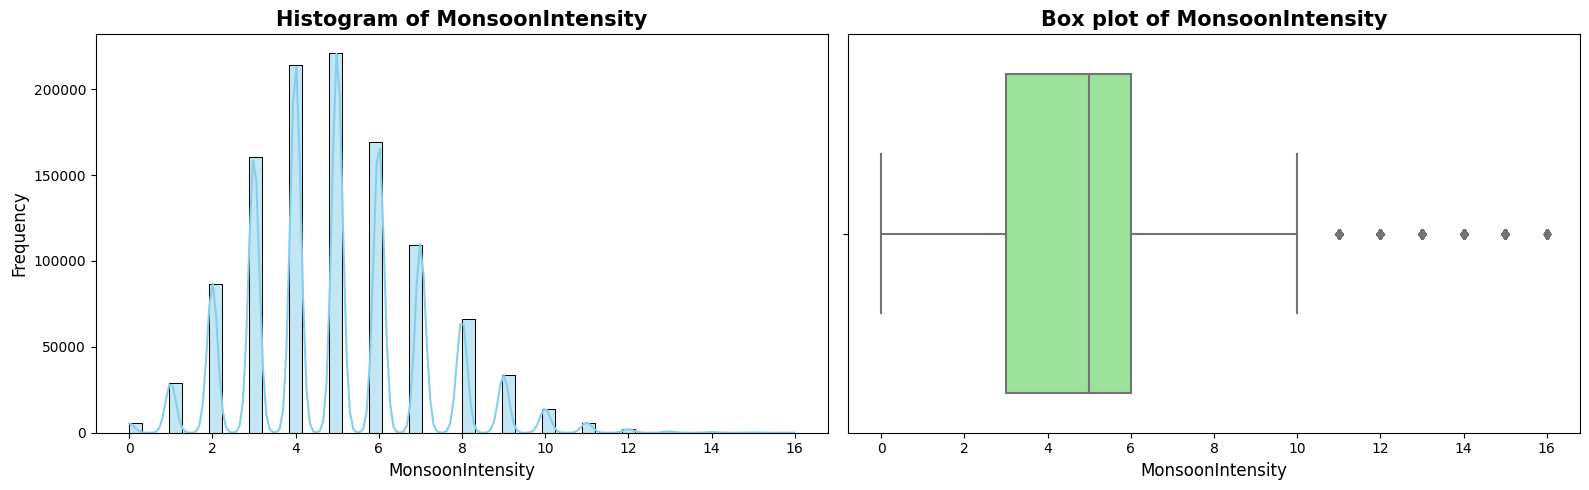

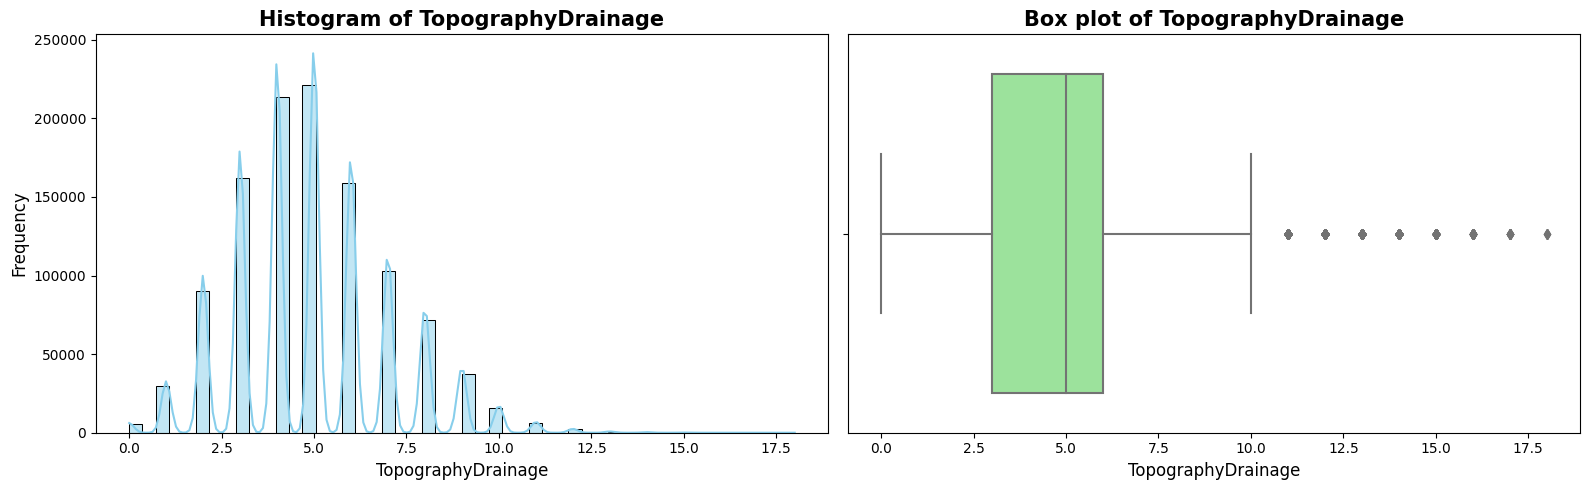

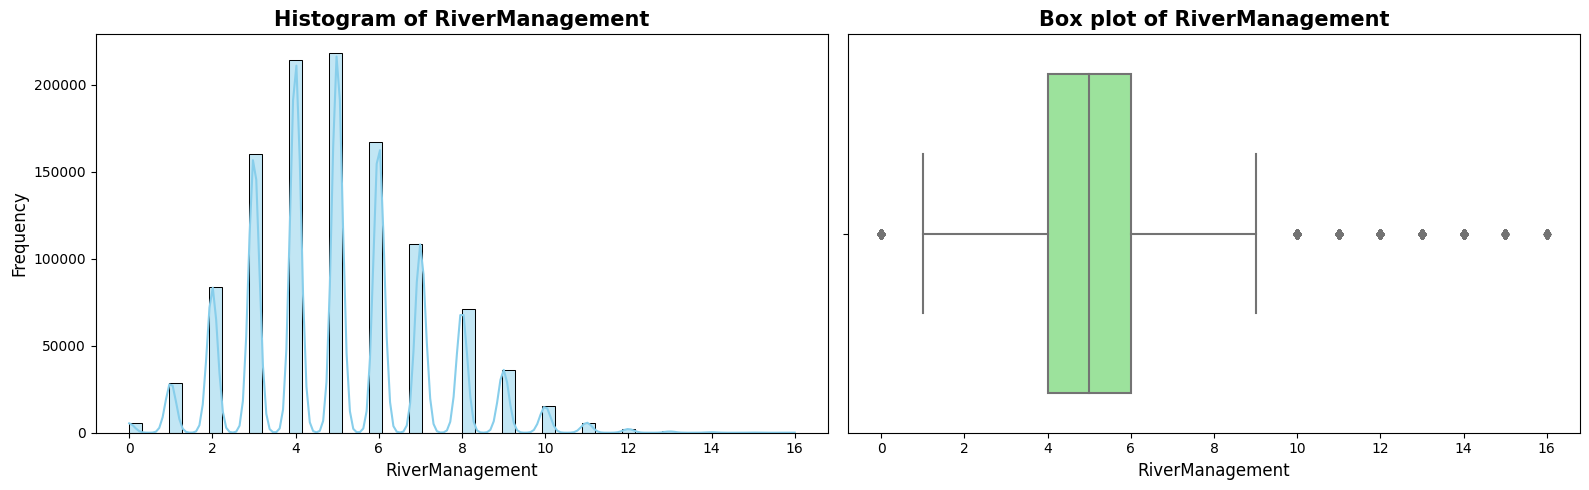

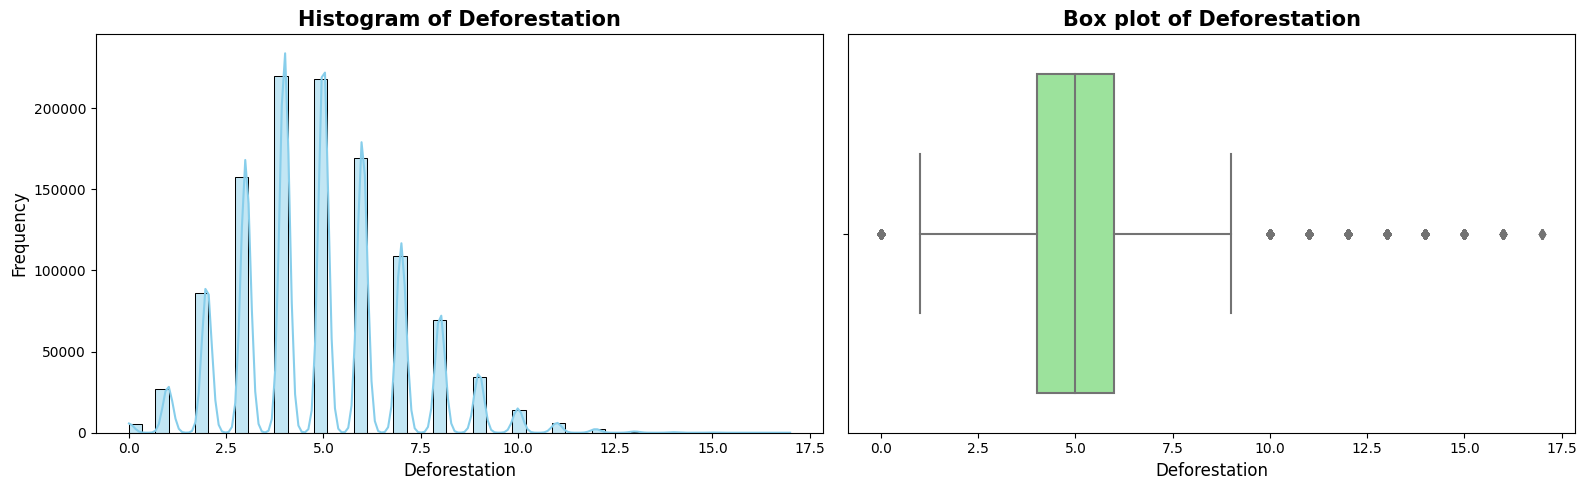

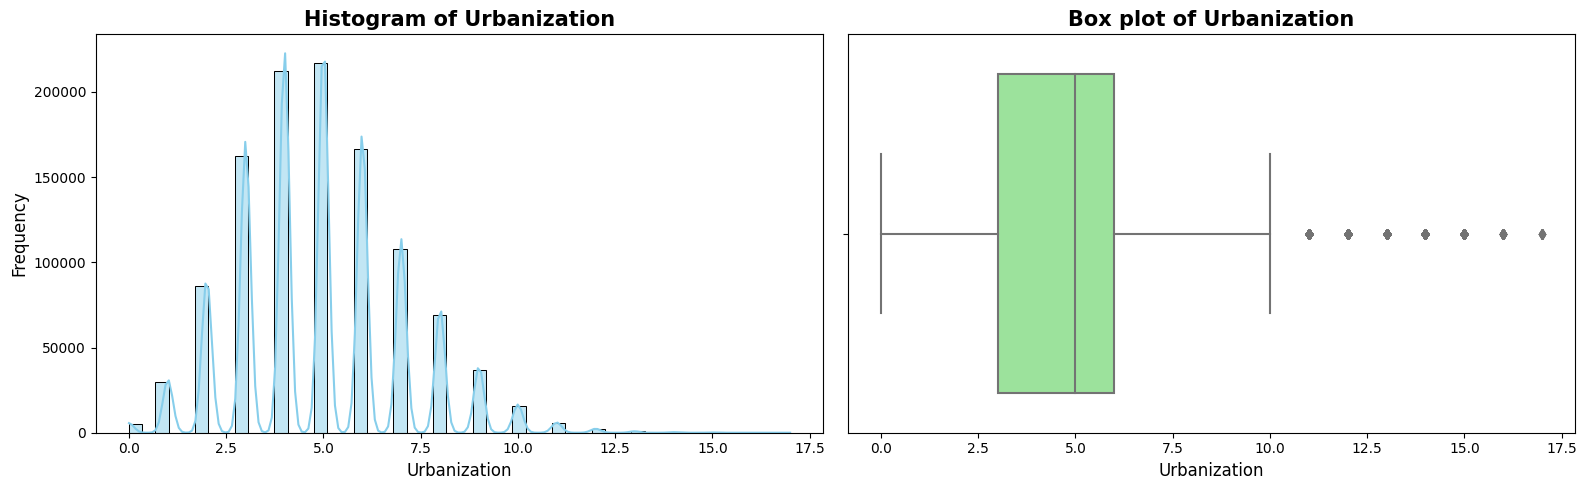

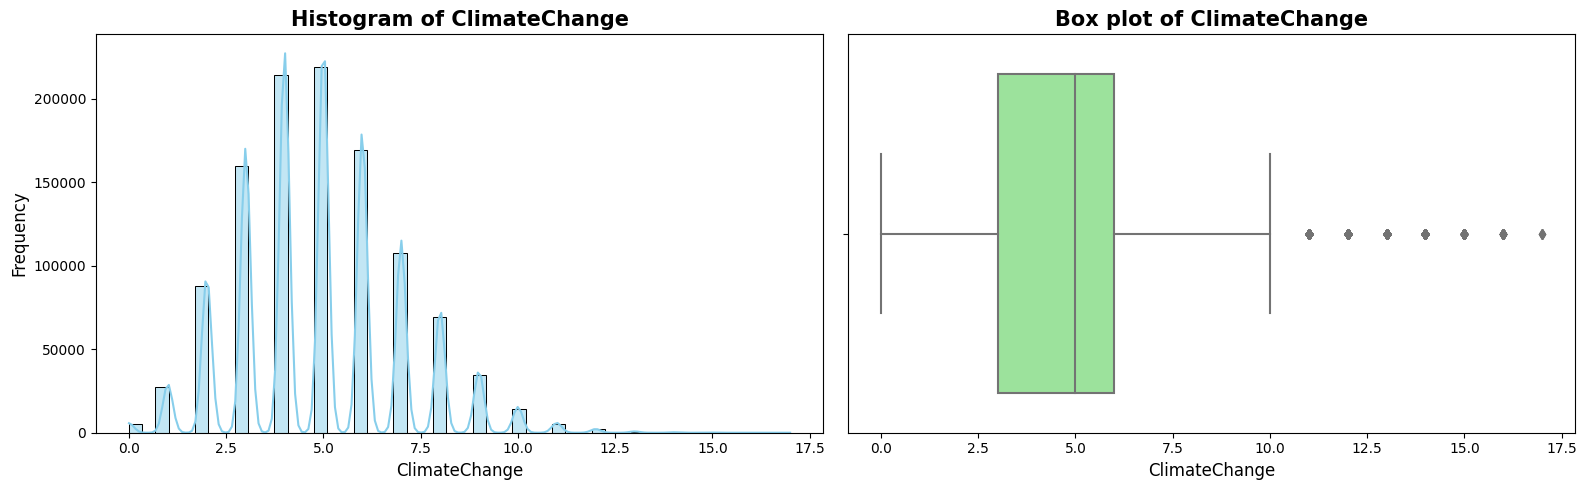

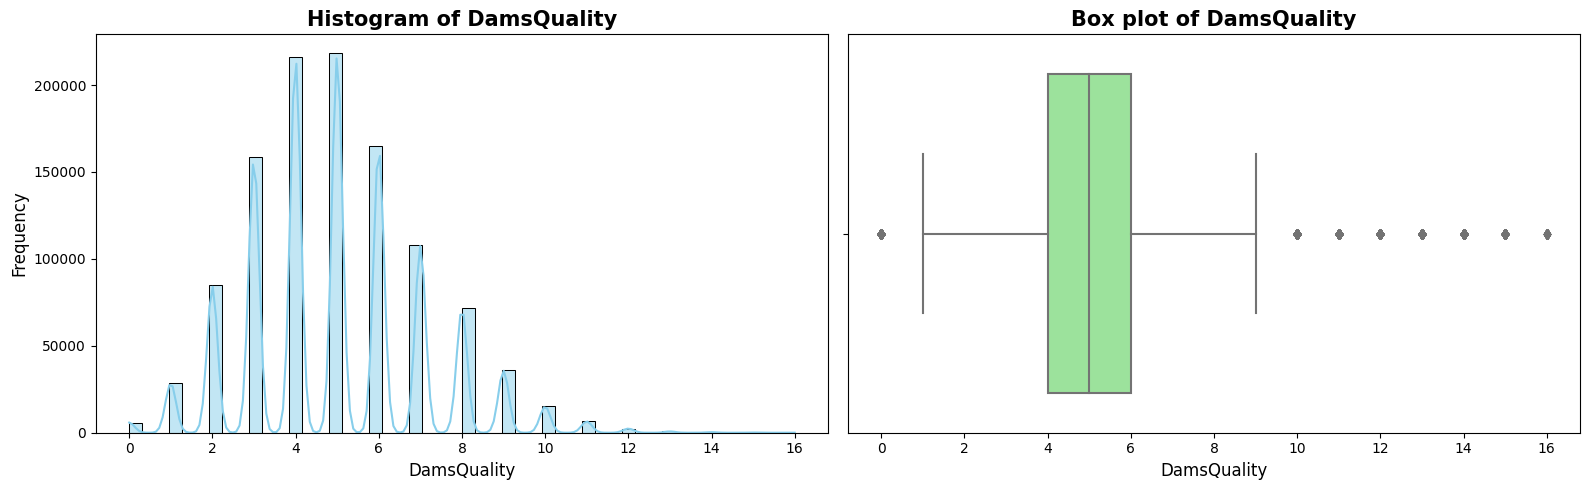

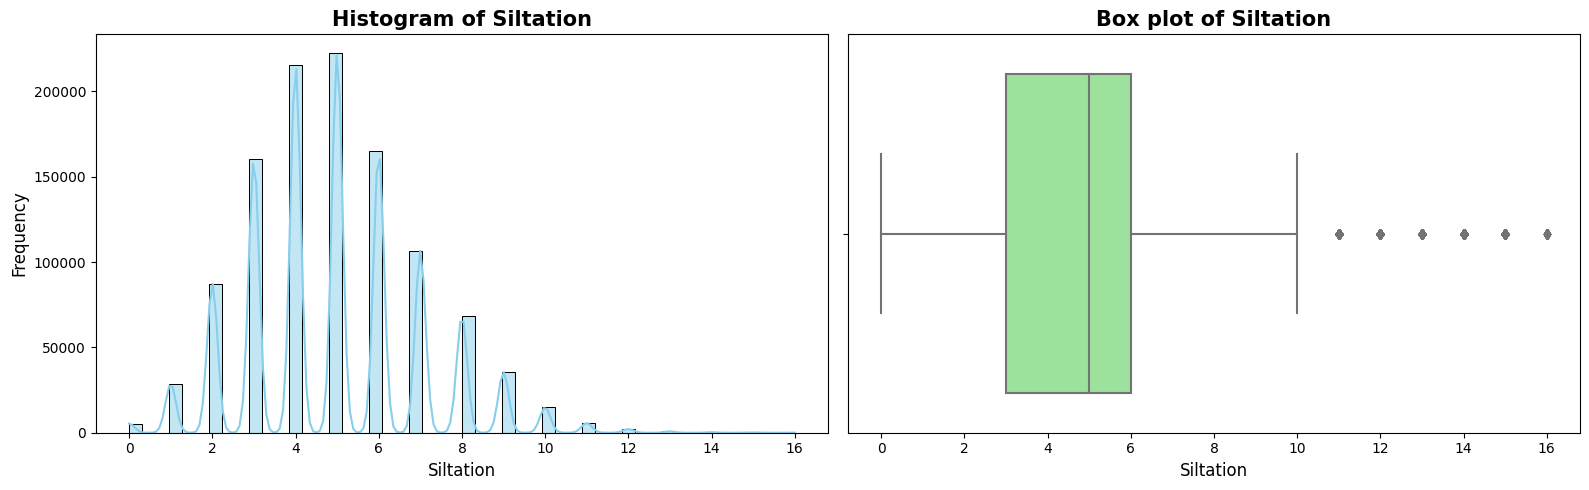

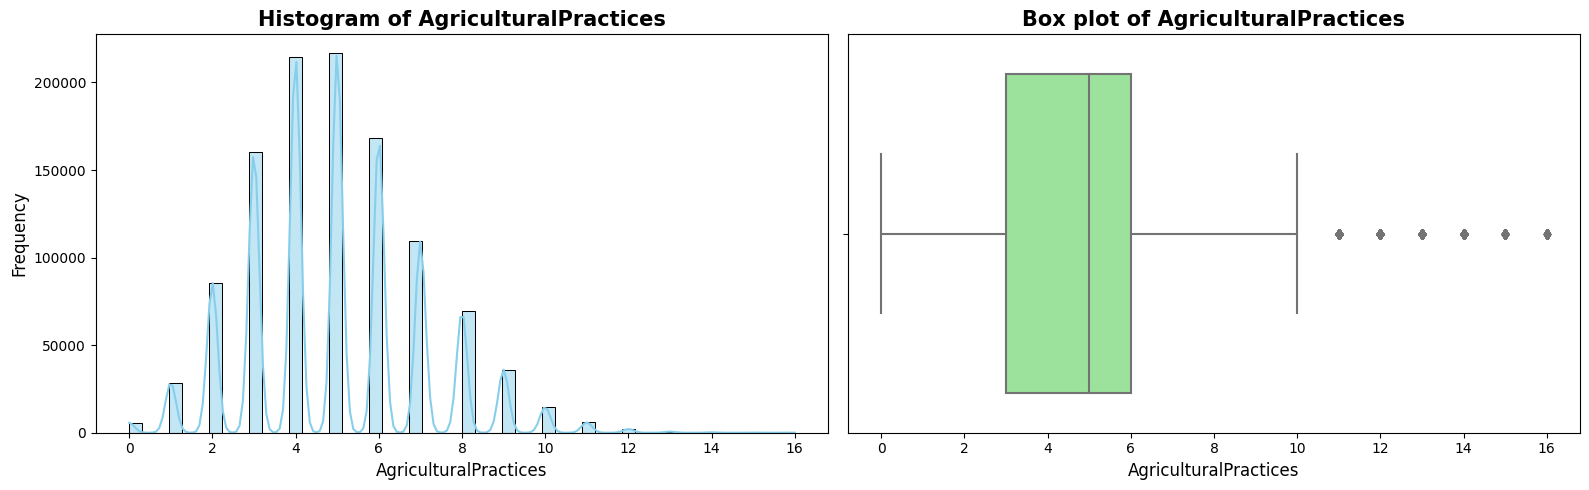

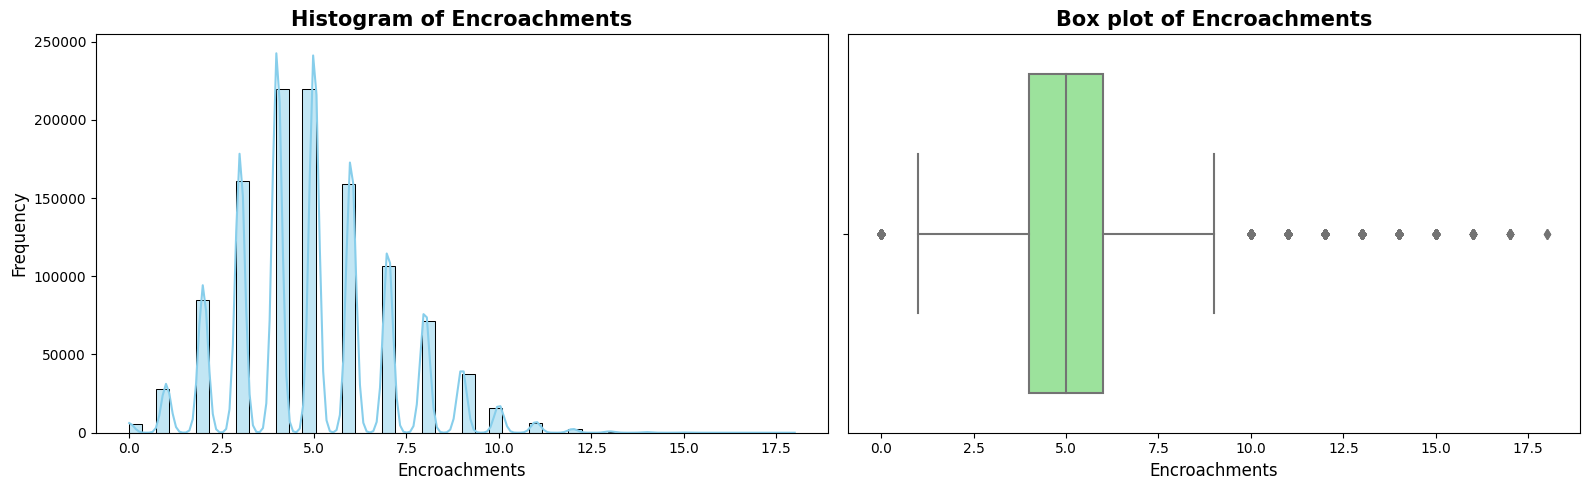

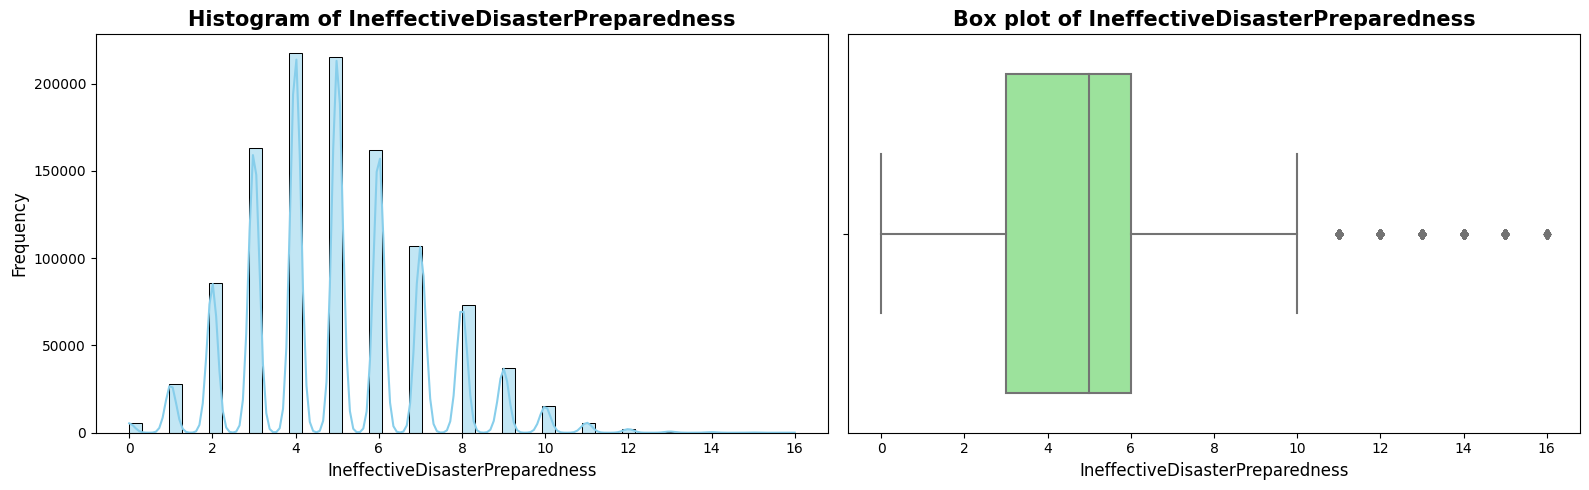

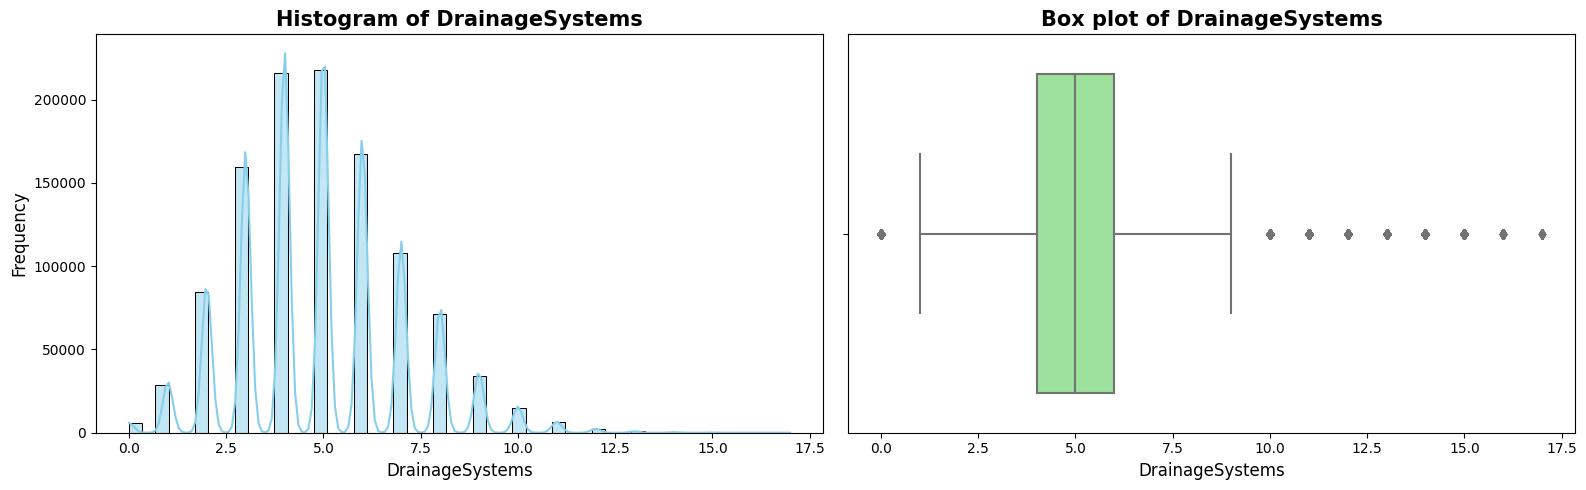

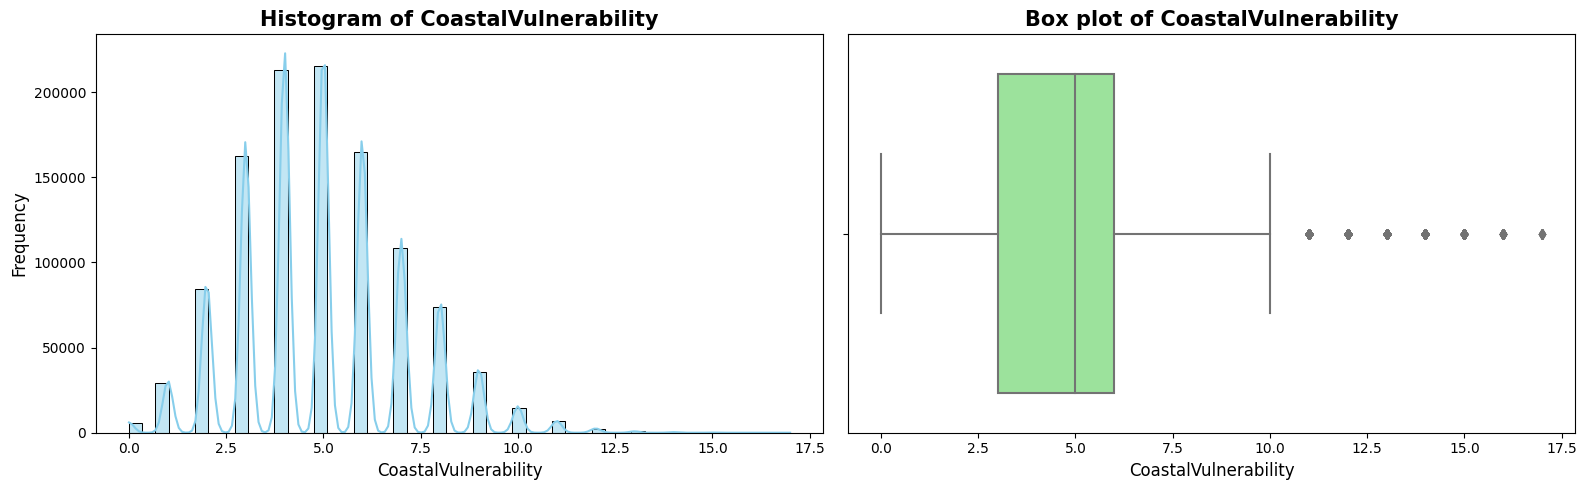

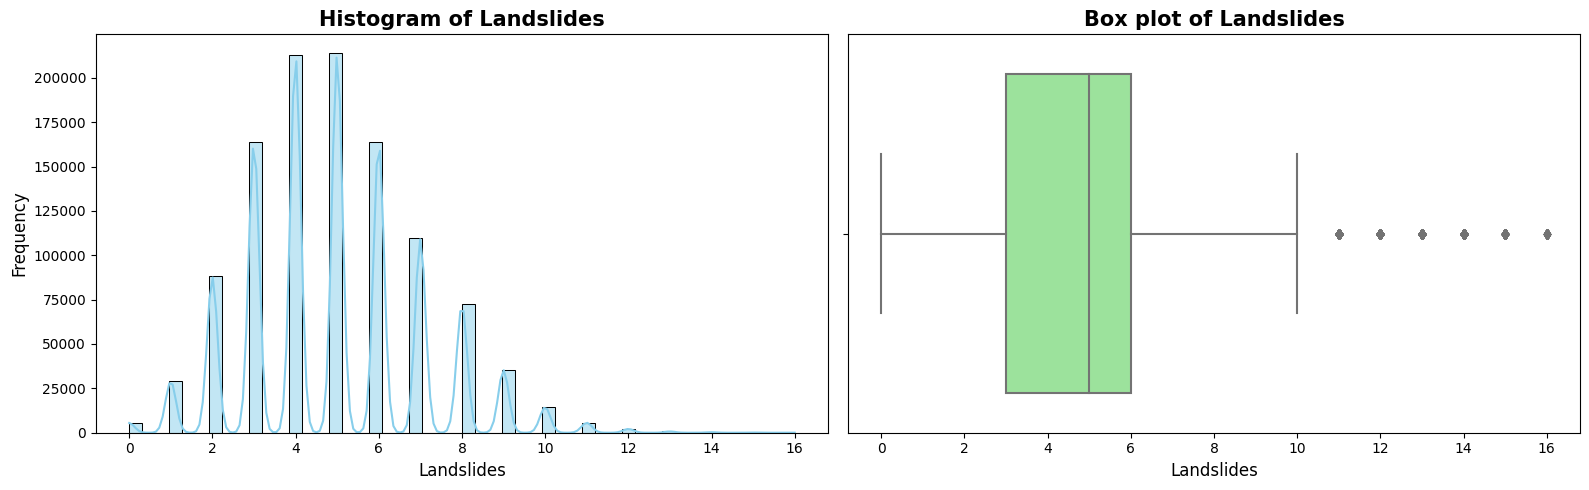

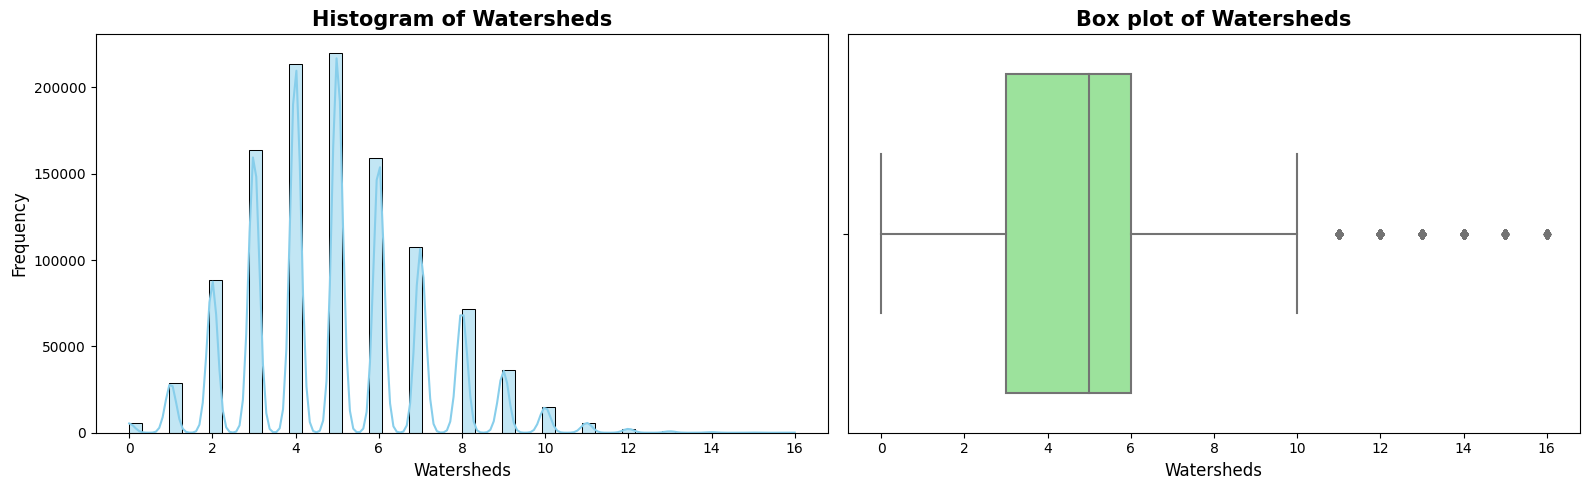

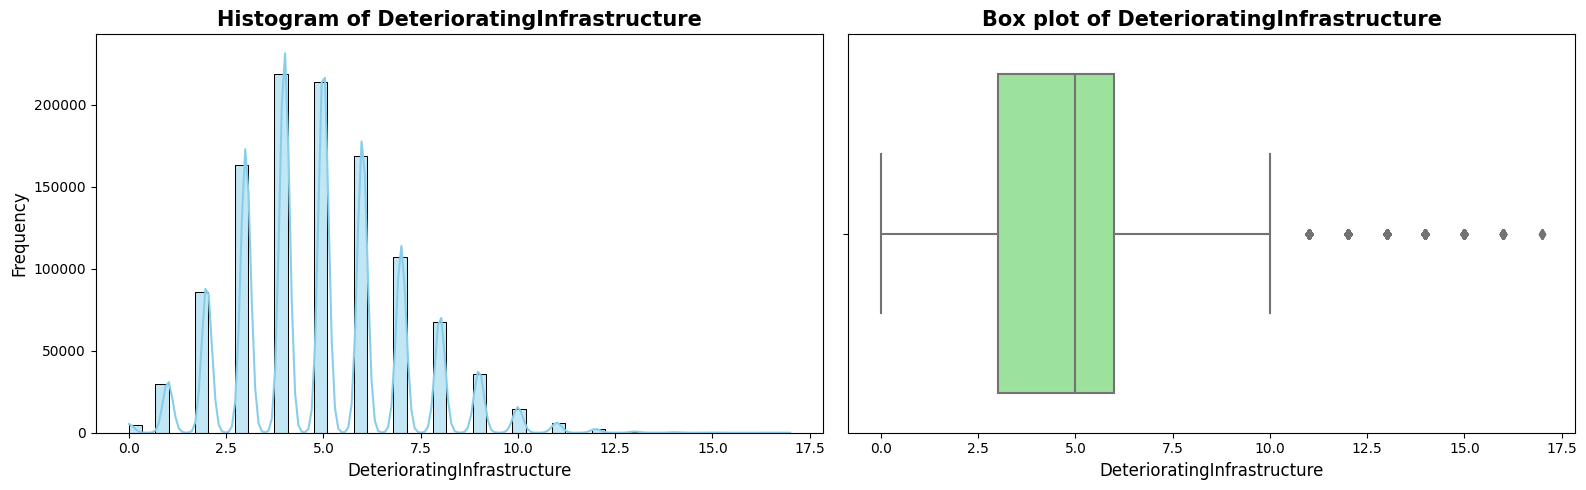

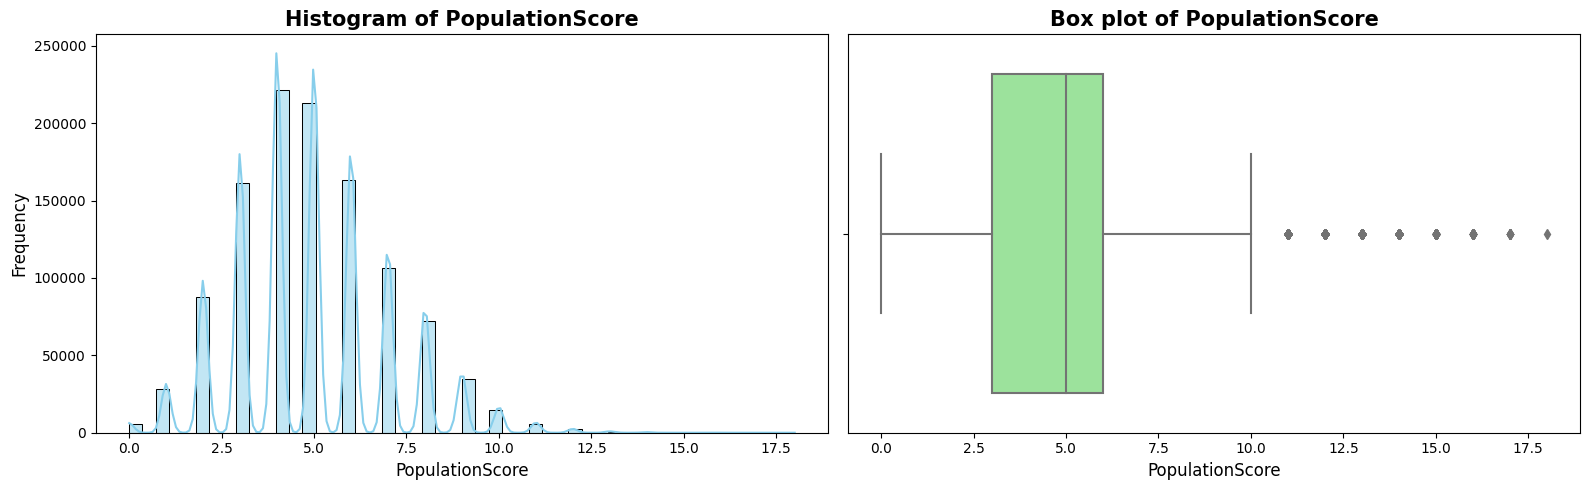

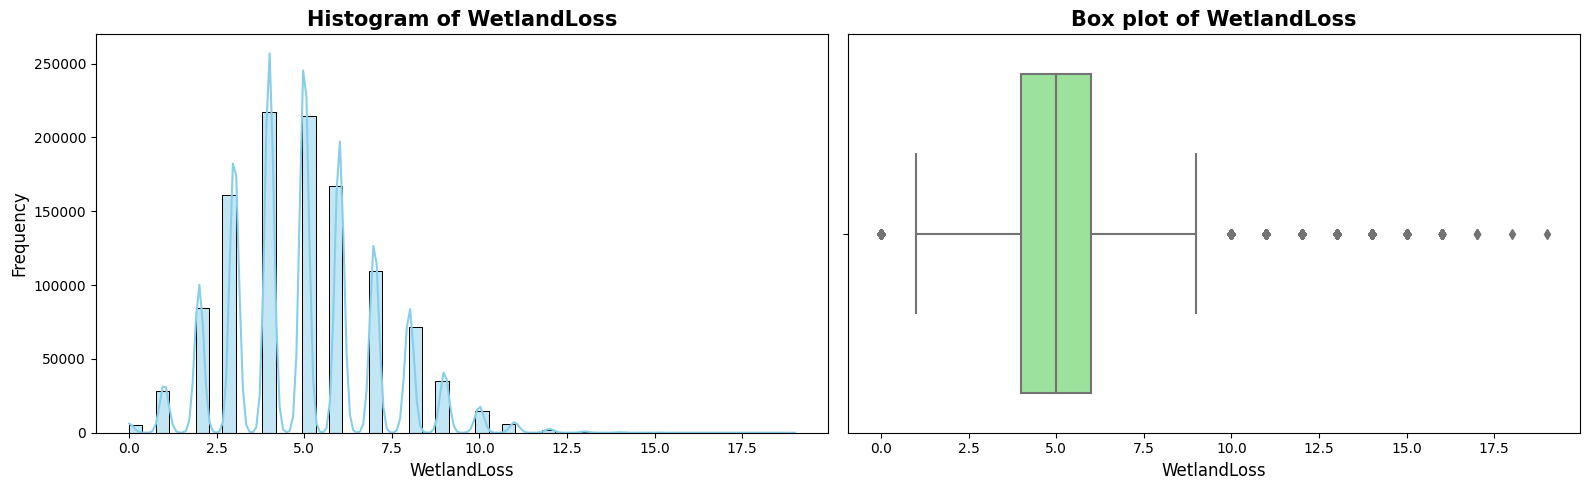

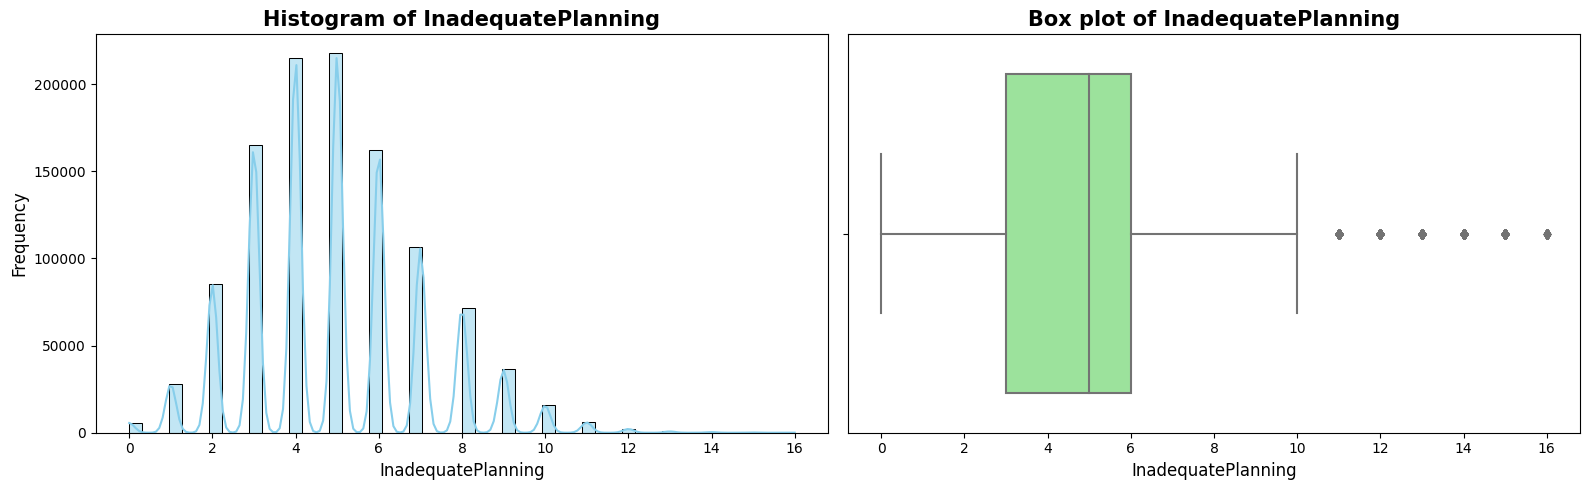

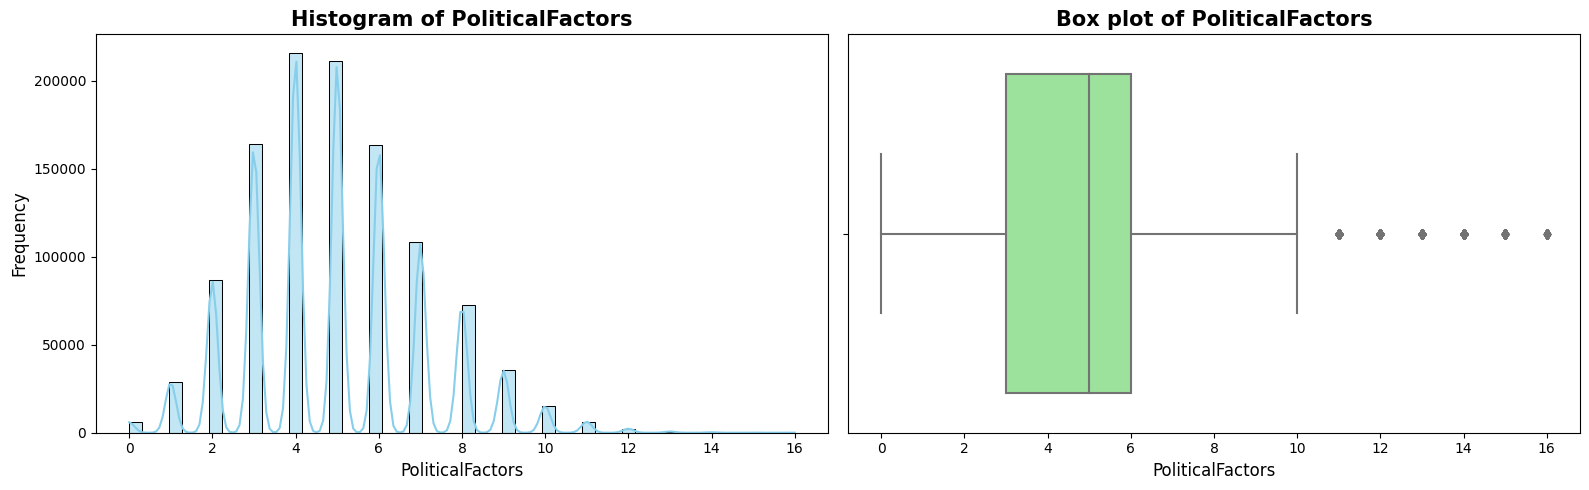

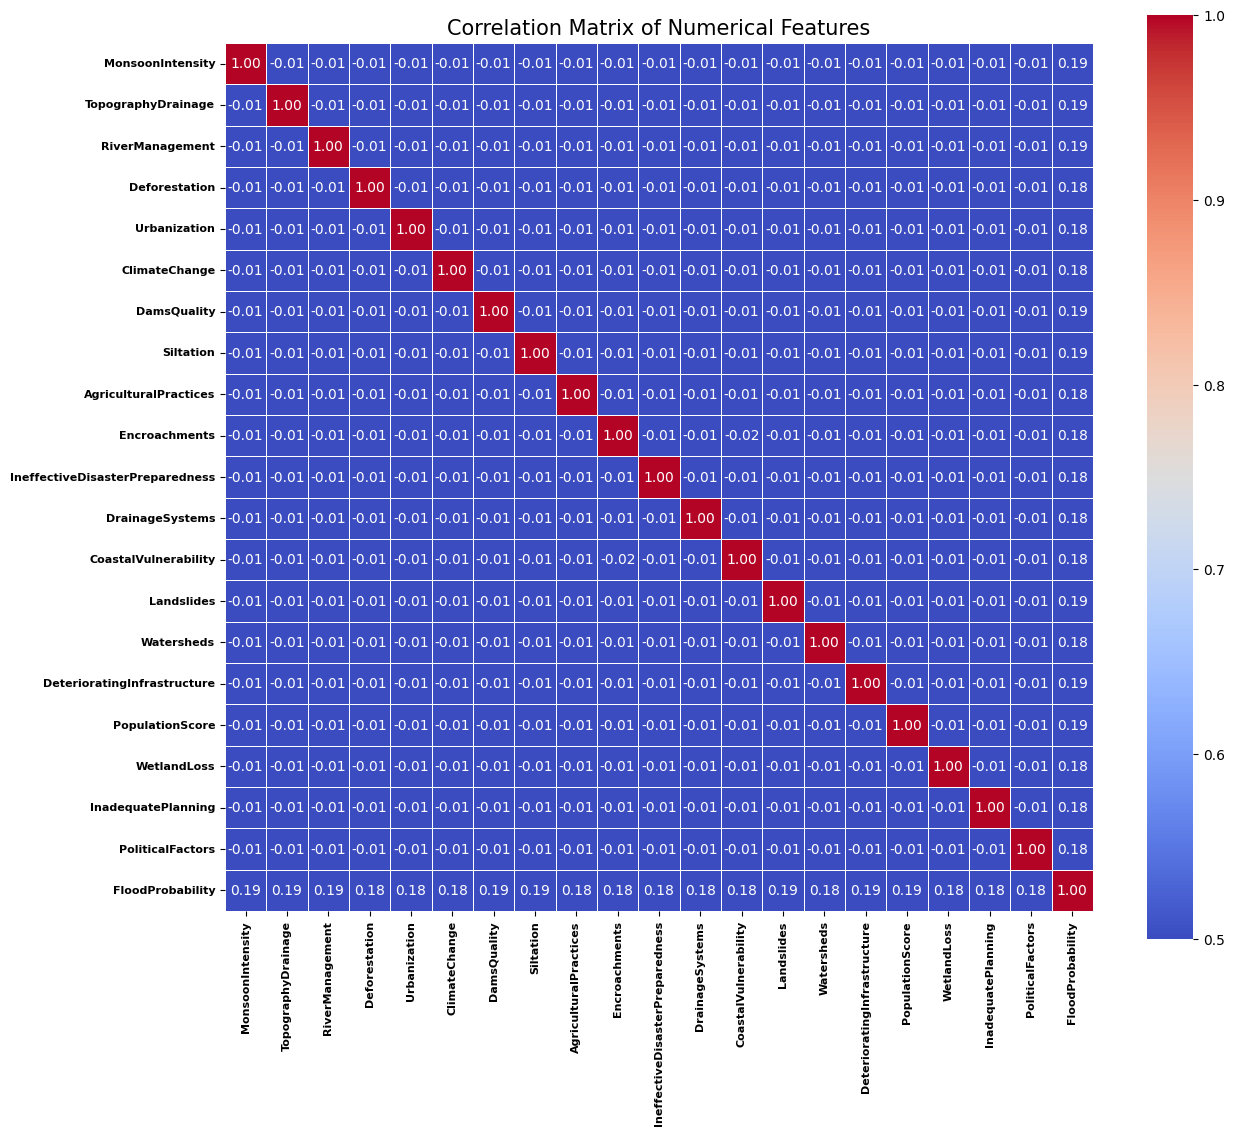

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.630625 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3985
[LightGBM] [Info] Number of data points in the train set: 894365, number of used features: 68
[LightGBM] [Info] Start training from score 0.504480
Training until validation scores don't improve for 50 rounds
[100]	valid_0's l2: 0.00034136
Did not meet early stopping. Best iteration is:
[94]	valid_0's l2: 0.000341358
Fold: 0  Train R2: 0.86967  Val R2: 0.86867
--------------------------------------------------
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.625993 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3990
[LightGBM] [Info] Number of data points in the train set: 894365, number of used features: 68
[LightGBM] [Info] Start training from score 0.504511
Training until validation scores don't improve f

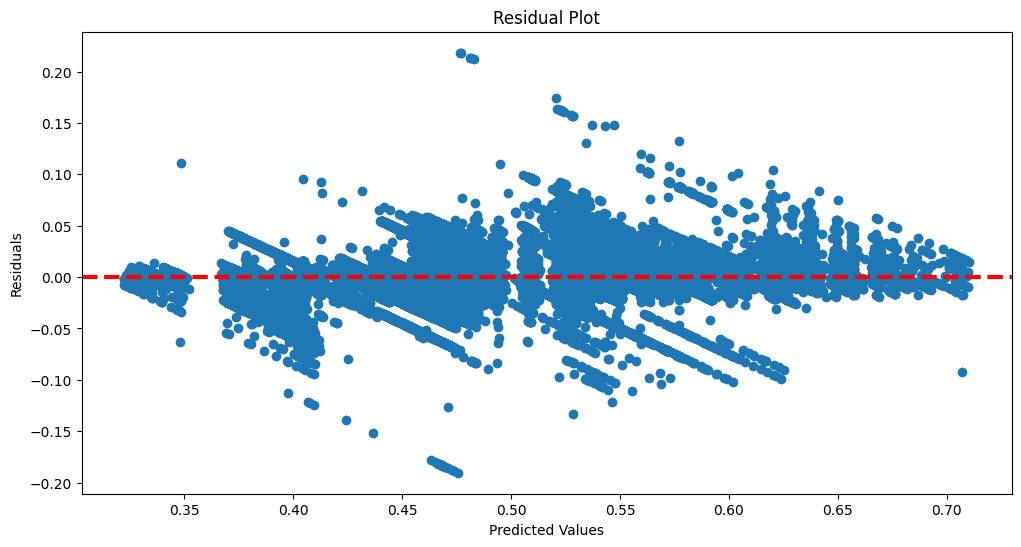

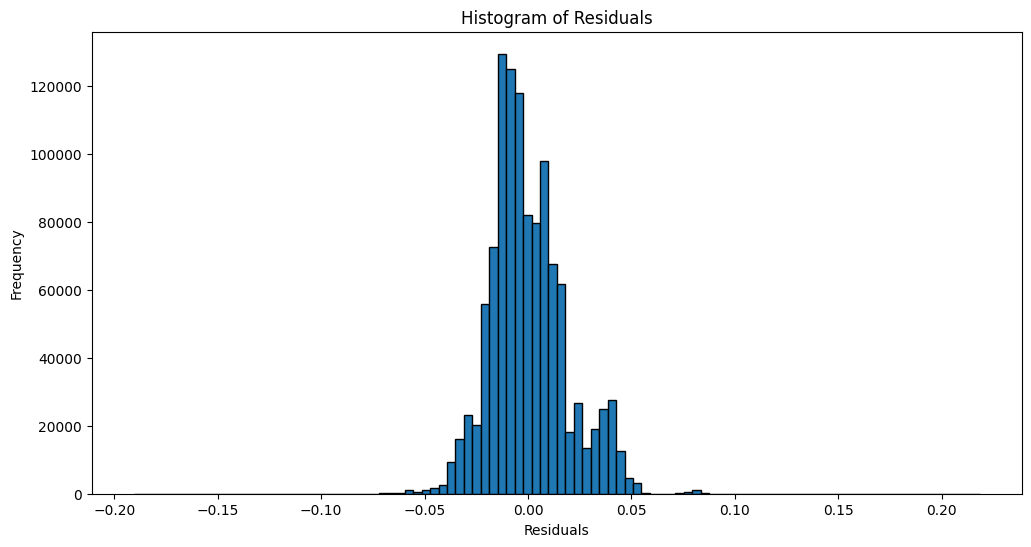

,id,FloodProbability
0,1117957,0.577121
1,1117958,0.456144
2,1117959,0.449200
3,1117960,0.466646
4,1117961,0.467881


In [6]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
import lightgbm as lgb

# Load data
df_train = pd.read_csv("/kaggle/input/playground-series-s4e5/train.csv")
df_test = pd.read_csv("/kaggle/input/playground-series-s4e5/test.csv")
sample_sub = pd.read_csv("/kaggle/input/playground-series-s4e5/sample_submission.csv")

print("Train:", len(df_train))

# Exploratory Data Analysis
print(df_train.info())
print(df_train.describe())

# Plot Functions
def plot_numerics(data):
    numeric_columns = data.columns
    for column in numeric_columns:
        _, ax = plt.subplots(1, 2, figsize=(16, 5))
        ax = ax.flatten()

        sns.histplot(data[column], bins=50, kde=True, color='skyblue', ax=ax[0])
        ax[0].set_title(f'Histogram of {column}', fontsize=15, fontweight='bold')
        ax[0].set_xlabel(column, fontsize=12)
        ax[0].set_ylabel('Frequency', fontsize=12)

        sns.boxplot(x=data[column], color='lightgreen', ax=ax[1])
        ax[1].set_title(f'Box plot of {column}', fontsize=15, fontweight='bold')
        ax[1].set_xlabel(column, fontsize=12)

        plt.tight_layout()
        plt.show()

def get_count_plot(cat):
    ax = sns.countplot(x=df_train[cat], order=df_train[cat].value_counts(ascending=False).index)
    abs_values = df_train[cat].value_counts(ascending=False)
    rel_values = df_train[cat].value_counts(ascending=False, normalize=True).values * 100
    lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
    ax.bar_label(container=ax.containers[0], labels=lbls)
    ax.set_title("Distribution of " + cat + " Values", fontsize=16)

# Plot Target Values
plt.figure(figsize=(25, 12))
plot_numerics(df_train[['FloodProbability']])

# Plot Numeric Values
num_cols = [
    'MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
    'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
    'Siltation', 'AgriculturalPractices', 'Encroachments',
    'IneffectiveDisasterPreparedness', 'DrainageSystems',
    'CoastalVulnerability', 'Landslides', 'Watersheds',
    'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
    'InadequatePlanning', 'PoliticalFactors'
]
plot_numerics(df_train[num_cols])

# Correlation
corr_matrix = df_train[num_cols + ['FloodProbability']].corr()
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, vmax=1, vmin=0.5, center=0.75, annot=True, fmt=".2f", square=True, 
            linewidths=.5, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features', fontsize=15)
plt.xticks(fontsize=8, fontweight='bold')
plt.yticks(fontsize=8, fontweight='bold')
plt.show()

# Feature Engineering
unique_vals = []
for df in [df_train, df_test]:
    for col in num_cols:
        unique_vals += list(df[col].unique())
unique_vals = list(set(unique_vals))

def getFeats(df):
    scaler = StandardScaler()
    
    df['sum'] = df[num_cols].sum(axis=1)
    df['std'] = df[num_cols].std(axis=1)
    df['mean'] = df[num_cols].mean(axis=1)
    df['max'] = df[num_cols].max(axis=1)
    df['min'] = df[num_cols].min(axis=1)
    df['mode'] = df[num_cols].mode(axis=1)[0]
    df['median'] = df[num_cols].median(axis=1)
    df['q_25th'] = df[num_cols].quantile(0.25, axis=1)
    df['q_75th'] = df[num_cols].quantile(0.75, axis=1)
    df['skew'] = df[num_cols].skew(axis=1)
    df['kurt'] = df[num_cols].kurt(axis=1)
    df['sum_72_76'] = df['sum'].isin(np.arange(72, 76))
    for i in range(10, 100, 10):
        df[f'{i}th'] = df[num_cols].quantile(i / 100, axis=1)
    df['harmonic'] = len(num_cols) / df[num_cols].apply(lambda x: (1 / x).mean(), axis=1)
    df['geometric'] = df[num_cols].apply(lambda x: x.prod()**(1 / len(x)), axis=1)
    df['zscore'] = df[num_cols].apply(lambda x: (x - x.mean()) / x.std(), axis=1).mean(axis=1)
    df['cv'] = df[num_cols].std(axis=1) / df[num_cols].mean(axis=1)
    df['Skewness_75'] = (df[num_cols].quantile(0.75, axis=1) - df[num_cols].mean(axis=1)) / df[num_cols].std(axis=1)
    df['Skewness_25'] = (df[num_cols].quantile(0.25, axis=1) - df[num_cols].mean(axis=1)) / df[num_cols].std(axis=1)
    df['2ndMoment'] = df[num_cols].apply(lambda x: (x**2).mean(), axis=1)
    df['3rdMoment'] = df[num_cols].apply(lambda x: (x**3).mean(), axis=1)
    df['entropy'] = df[num_cols].apply(lambda x: -1 * (x * np.log(x)).sum(), axis=1)
    
    for v in unique_vals:
        df['cnt_{}'.format(v)] = (df[num_cols] == v).sum(axis=1)
    
    df[num_cols] = scaler.fit_transform(df[num_cols])
    
    return df

df_train['typ'] = 0
df_test['typ'] = 1
df_all = pd.concat([df_train, df_test], axis=0)
df_all = getFeats(df_all)
df_all.head()
df_train = df_all[df_all['typ'] == 0]
df_test = df_all[df_all['typ'] == 1]

X = df_train.drop(['id', 'FloodProbability', 'typ'], axis=1)
y = df_train['FloodProbability']
feats = list(X.columns)

# Training with Cross-Validation
def cross_val_train(X, y, df_test):
    spl = 5
    test_preds = np.zeros((len(df_test)))
    val_preds = np.zeros((len(X)))
    val_scores, train_scores = [], []
    
    cv = KFold(spl, shuffle=True, random_state=42)
    
    for fold, (train_ind, valid_ind) in enumerate(cv.split(X, y)):
        X_train = X.iloc[train_ind]
        y_train = y[train_ind]
        X_val = X.iloc[valid_ind]
        y_val = y[valid_ind]
        
        model = lgb.LGBMRegressor()
        model.fit(X_train, y_train,
                  eval_set=[(X_val, y_val)],
                  callbacks=[lgb.early_stopping(stopping_rounds=50), lgb.log_evaluation(100)])
        
        y_pred_trn = model.predict(X_train)
        y_pred_val = model.predict(X_val)
        train_r2 = r2_score(y_train, y_pred_trn)
        val_r2 = r2_score(y_val, y_pred_val)
        print("Fold:", fold, " Train R2:", np.round(train_r2, 5), " Val R2:", np.round(val_r2, 5))
        
        test_preds += model.predict(df_test[feats]) / spl
        val_preds[valid_ind] = model.predict(X_val)
        val_scores.append(val_r2)
        print("-" * 50)
        
    return val_scores, val_preds, test_preds

val_scores, val_preds, test_preds = cross_val_train(X, y, df_test)

# Evaluate the model
mse = mean_squared_error(y, val_preds)
rmse = np.sqrt(mean_squared_error(y, val_preds))
r2 = r2_score(y, val_preds)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R2: {r2}')

# Plot Residuals
plt.figure(figsize=(12, 6))
residuals = y - val_preds
plt.scatter(val_preds, residuals)
plt.axhline(y=0, color='red', linestyle='--', linewidth=3)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Plot histogram of residuals
plt.figure(figsize=(12, 6))
plt.hist(residuals, bins=100, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

# Submission
sub = sample_sub[['id']]
sub['FloodProbability'] = test_preds
sub.to_csv('submission.csv', index=False)
sub.head()


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import lightgbm as lgb

# Load the data
train_data = pd.read_csv('/kaggle/input/playground-series-s4e5/train.csv')
test_data = pd.read_csv('/kaggle/input/playground-series-s4e5/test.csv')
sample_submission = pd.read_csv('/kaggle/input/playground-series-s4e5/sample_submission.csv')

# Data Preparation
X = train_data.drop(columns=['FloodProbability'])
y = train_data['FloodProbability']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=40)

# Normalize/scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
test_data_scaled = scaler.transform(test_data)

# Convert scaled data back to DataFrame to maintain compatibility with LightGBM
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=X.columns)
test_data_scaled = pd.DataFrame(test_data_scaled, columns=test_data.columns)

# Initialize and train the LightGBM model
lgb_model = lgb.LGBMRegressor()
lgb_model.fit(X_train_scaled, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.146179 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 623
[LightGBM] [Info] Number of data points in the train set: 782569, number of used features: 21
[LightGBM] [Info] Start training from score 0.504446


LGBMRegressor()

In [4]:
y_pred_val = lgb_model.predict(X_val_scaled)
val_rmse = mean_squared_error(y_val, y_pred_val, squared=False)
print(f"Validation RMSE: {val_rmse:.2f}")

# Make predictions on the test data
predictions = lgb_model.predict(test_data_scaled)

# Create the submission file
submission = pd.DataFrame({'id': test_data['id'], 'FloodProbability': predictions})
submission.to_csv("lgbm_submission.csv", index=False)
print("Predictions saved for the LightGBM model")

Validation RMSE: 0.02
Predictions saved for the LightGBM model


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import lightgbm as lgb

# Load the data
train_data = pd.read_csv('/kaggle/input/playground-series-s4e5/train.csv')
test_data = pd.read_csv('/kaggle/input/playground-series-s4e5/test.csv')
sample_submission = pd.read_csv('/kaggle/input/playground-series-s4e5/sample_submission.csv')

# Data Preparation
X = train_data.drop(columns=['FloodProbability'])
y = train_data['FloodProbability']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize/scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
test_data_scaled = scaler.transform(test_data)

# Convert scaled data back to DataFrame to maintain compatibility with LightGBM
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=X.columns)
test_data_scaled = pd.DataFrame(test_data_scaled, columns=test_data.columns)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'num_leaves': [31, 50, 70],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'max_depth': [-1, 10, 20],
    'min_child_samples': [20, 30, 40]
}

# Initialize LightGBM model
lgb_model = lgb.LGBMRegressor()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=lgb_model, param_grid=param_grid, cv=3, scoring='neg_root_mean_squared_error', verbose=2)
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters:", best_params)

# Train the model with the best parameters
best_lgb_model = lgb.LGBMRegressor(**best_params)
best_lgb_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred_val = best_lgb_model.predict(X_val_scaled)
val_rmse = mean_squared_error(y_val, y_pred_val, squared=False)
print(f"Validation RMSE: {val_rmse:.2f}")

# Make predictions on the test data
predictions = best_lgb_model.predict(test_data_scaled)

# Create the submission file
submission = pd.DataFrame({'id': test_data['id'], 'FloodProbability': predictions})
submission.to_csv("best_lgbm_submission.csv", index=False)
print("Predictions saved for the best LightGBM model")

Fitting 3 folds for each of 243 candidates, totalling 729 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.109912 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 621
[LightGBM] [Info] Number of data points in the train set: 596243, number of used features: 21
[LightGBM] [Info] Start training from score 0.504496
[CV] END learning_rate=0.01, max_depth=-1, min_child_samples=20, n_estimators=100, num_leaves=31; total time=  12.5s
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.110206 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 624
[LightGBM] [Info] Number of data points in the train set: 596243, number of used features: 21
[LightGBM] [Info] Start training from score 0.504457
[CV] END learning_rate=0.01, max_depth=-1, min_child_samples=20, n_estimators=100, num_leaves=31; total time=  12.3s
[LightGBM] [Info] A